<a href="https://colab.research.google.com/github/DrSubbiah/1.Bayesian-Inference/blob/master/1_Bayes_Discrete_Prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="darkblue"> Models without Predictors

[Honda Vs Hero](https://auto.economictimes.indiatimes.com/news/two-wheelers/motorcycles/honda-disputes-hero-splendor-ismarts-fuel-economy-claim-of-102-5-km/litre/47139285)

**Japanese auto maker Honda has questioned its erstwhile Indian partner Hero's claim of <font color="red">102.5 km/litre </font> fuel economy rate for Splendor iSmart bike, saying "such claims are misleading and are far from reality".**


<font color="green">**The Indian firm, Hero MotoCorp on its part hit back saying its fuel efficiency values were certified by iCAT (International Centre for Automotive Technology)**

CAT may test mileage of the bikes of the same brand

Output would be the mileage in <font color="red">---- km/litre </font> for each bike

There may not be any "predictors / features"

Yet, we may be interested to test the claim in an analytical manner

# <font color="darkblue"> Possible Metrics

1.   Number of bikes having the mileage as per Hero's claim out of a batch of bikes to test

1.   Number of bikes having the mileage as per Hero's claim from an unknown number of bikes to be tested (CAT may decide)

1.   Average mileage from an arbitrary number of bikes to be tested

#<font color="darkblue"> Two Cultures

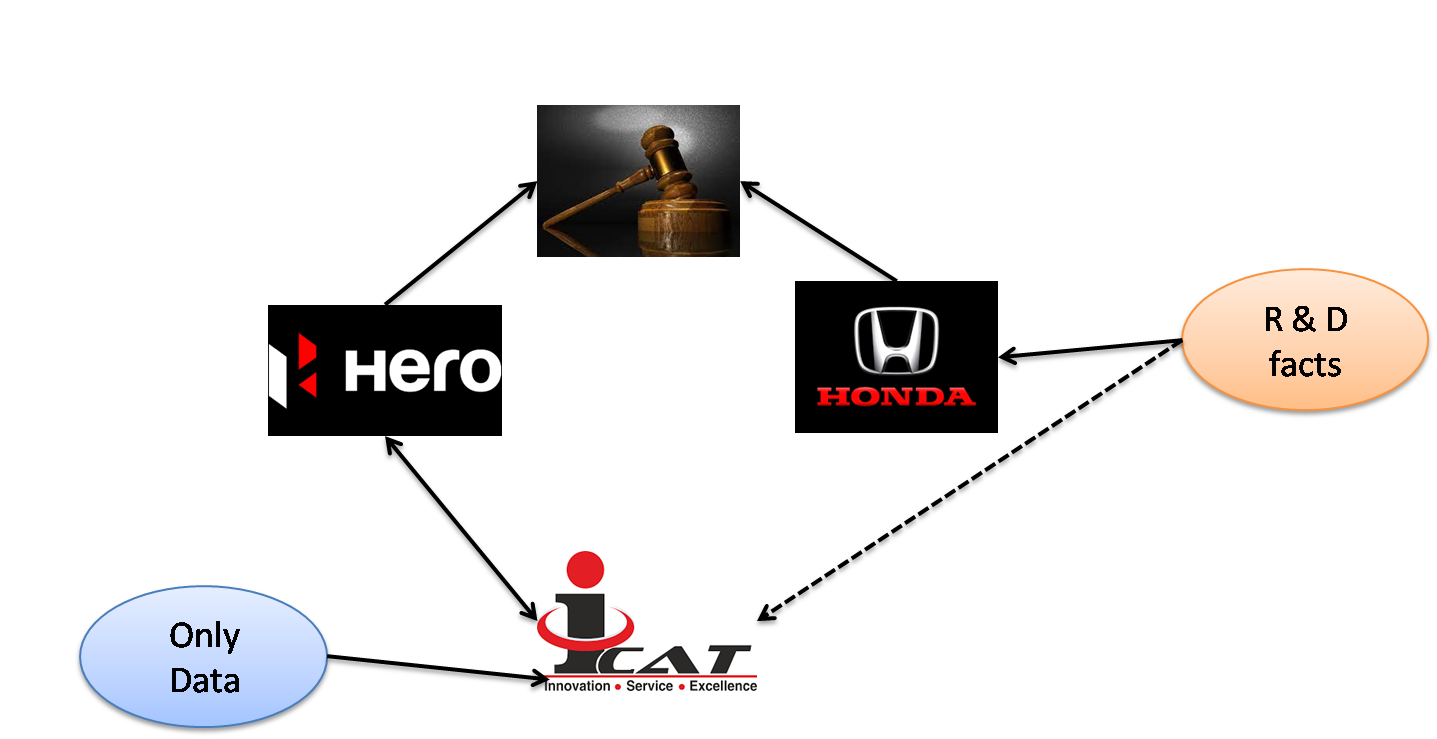

In [ ]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats as st
import matplotlib.pyplot as plt

# <font color="darkblue"> Data Type I

Batch size known

Looking for the **number** of bikes have passed the test

 Parameter  Prior  Posterior
      0.10   0.01      0.000
      0.40   0.02      0.686
      0.50   0.52      0.314
      0.75   0.20      0.000
      0.90   0.25      0.000


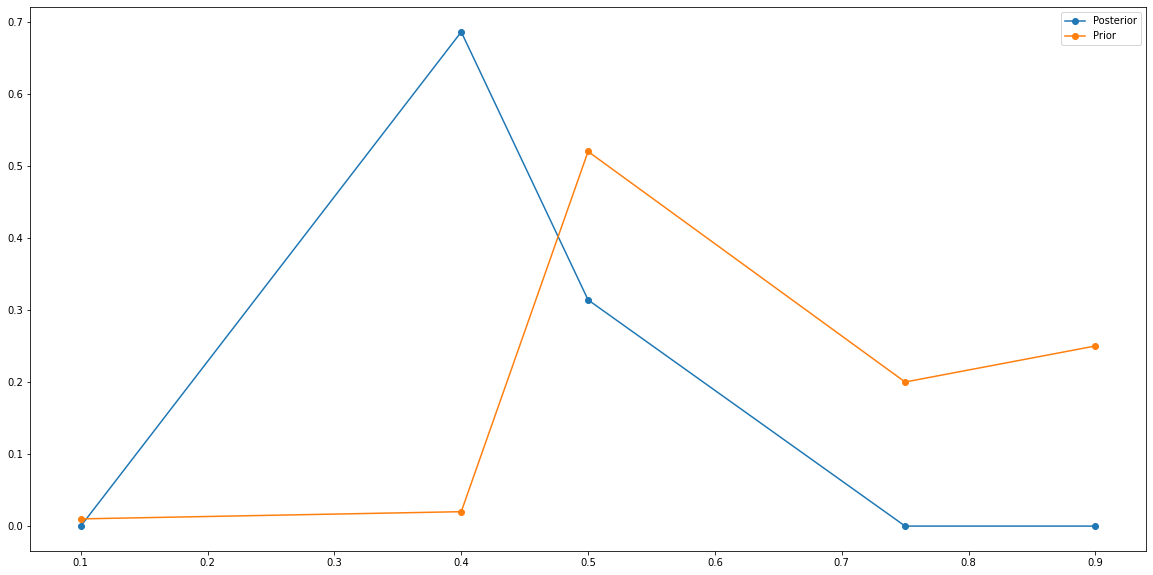

In [ ]:
theta=np.array([0.1,0.4, 0.5,0.75, 0.9])
prior_theta=np.array([0.01,0.02,0.52,0.2,0.25])

n=100
x=35

likel_b=st.binom.pmf(x,n,theta)

poste_theta=likel_b*prior_theta/sum(likel_b*prior_theta)
poste_theta=np.round(poste_theta,3)

r1=pd.concat([pd.DataFrame(theta),pd.DataFrame(prior_theta),pd.DataFrame(poste_theta)],axis=1)
r1.columns=["Parameter","Prior","Posterior"]
print(r1.to_string(index=False))
fig = plt.figure(figsize = (20, 10))
plt.plot(theta, poste_theta, 'o-', label= 'Posterior')
plt.plot(theta, prior_theta, 'o-', label= 'Prior')
plt.legend()

# <font color="darkblue"> Data Type II

**Number** of bikes passed the test

In [ ]:
theta=np.array([30, 40, 50,60])
prior_theta=np.array([0.4,0.25,0.18,0.17])

x=st.randint.rvs(low=30,high=100,size=1)

likel_p=st.poisson.pmf(x,theta)

poste_theta=likel_p*prior_theta/sum(likel_p*prior_theta)
poste_theta=np.round(poste_theta,3)

r2=pd.concat([pd.DataFrame(theta),pd.DataFrame(prior_theta),pd.DataFrame(poste_theta)],axis=1)
r2.columns=["Parameter","Prior","Posterior"]
print(r2.to_string(index=False))

 Parameter  Prior  Posterior
        30   0.40      0.000
        40   0.25      0.000
        50   0.18      0.009
        60   0.17      0.991


# <font color="darkblue"> Data Type III

**Average Mileage** of a batch of bikes passed the test

Batch size pre-defined

In [ ]:
t1=st.uniform.rvs(loc=98,scale=7,size=5)
theta=np.array(t1)
prior_theta=np.array([0.4,0.15,0.1,0.18,0.17])

x=st.norm.rvs(100,1,size=1)

likel_n=st.norm.pdf(x,theta)

poste_theta=likel_n*prior_theta/sum(likel_n*prior_theta)
poste_theta=np.round(poste_theta,3)

r3=pd.concat([pd.DataFrame(theta),pd.DataFrame(prior_theta),pd.DataFrame(poste_theta)],axis=1)
r3.columns=["Parameter","Prior","Posterior"]
print(r3.to_string(index=False))

# <font color="darkblue">Understanding Bayesian Approach using Discrete Probabilities

Parameter is a random variable

Parametric values can be chosen arbitrarily (discretized for a continuous variable)

Probable weights can be assigned to each of these values

Compute the likelihood after observing the data for the above set of parametriv values

Find the posterior probabilites


# <font color="darkblue"> More Data for Customers

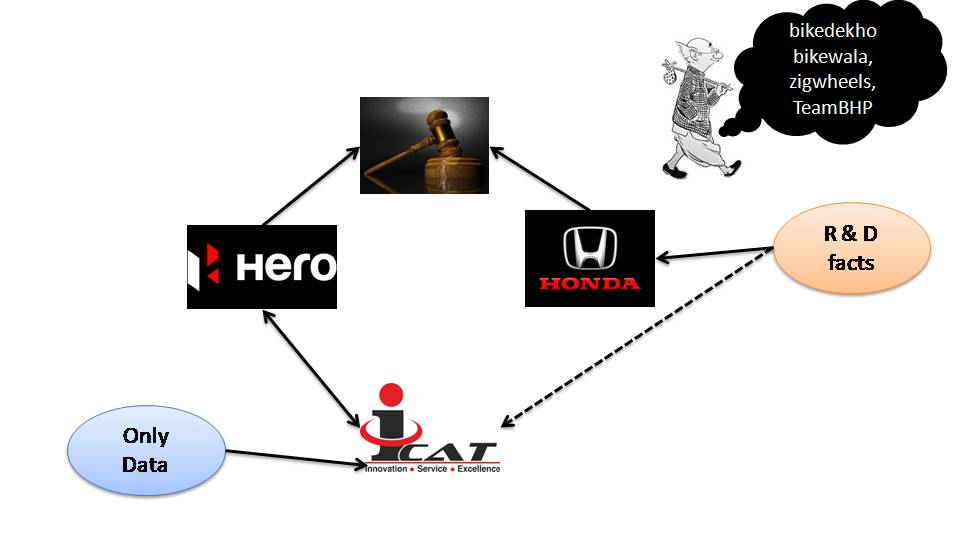

# <font color="darkblue"> Process in Symbols with Solid and Dashed line Information

$\theta$: <font color="darkred">Parameters</font>
 - Choices are made

$p(\theta)$: <font color="darkred">Prior</font> Probabilites
 - Assigned arbitrarily (in our case) but add to one (1)

$X$: <font color="darkred">Data</font>
 - Hypothetical in our case

$\mathcal{L}(\theta|X)$: <font color="darkred">likelihood</font>
 - Computation using respective data distribution

Then <font color="darkred">posterior</font>
 is

$$π(\theta|X)=\frac{\mathcal{L}(\theta|X)p(\theta)}{\sum\mathcal{L}(\theta|X)p(\theta)}$$


**Last line is the Bayes Formula**

Summation in the denominator would be integration if the parameter is continous

Computation degree might increase and added by the dimension of parameters

# <font color="darkblue"> Keyterms

1. Culture of Quantifying Uncertainty

1. Platform for Analytics beyond data

1. Data types

1. Bayesian framework - Data * Prior = Posterior

  - Both Prior and Posterior are estimating "same" but in a process of updating with data

 - Data Distribution and their components become major integral part

1. Computations may be a demading exercise